**You can read in the kaggle data directly to google colab**

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"


In [3]:
%cd /content/gdrive/My Drive/Kaggle


/content/gdrive/My Drive/Kaggle


In [5]:
!kaggle datasets download -d andyczhao/covidx-cxr2

100% 10.7G/10.7G [02:52<00:00, 61.7MB/s]
100% 10.7G/10.7G [02:52<00:00, 66.5MB/s]


In [11]:
%cd COVID_contest

/content/gdrive/My Drive/Kaggle/COVID_contest


In [ ]:
!unzip \*.zip  && rm *.zip

**READ DATA, MAKE DATALOADER, VISUALIZE, ETC**

In [30]:
# import, start work here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2


In [26]:
train_data = pd.read_csv('train.txt', delimiter = ' ', header = 0)

In [27]:
train_data.head()

,5,ARDSSevere.png,negative,cohen
0,25,acute-respiratory-distress-syndrome-ards-1.jpg,negative,cohen
1,26,acute-respiratory-distress-syndrome-ards.jpg,negative,cohen
2,27,ards-secondary-to-tiger-snake-bite.png,negative,cohen
3,28,pneumocystis-pneumonia-2-PA.png,negative,cohen
4,38,F051E018-DAD1-4506-AD43-BE4CA29E960B.jpeg,negative,cohen


In [28]:
train_data.columns = ['patient','file','class','source']
train_data['class'] = [0 if i =='negative' else 1 for i in train_data['class']]

In [29]:
train_data.head()

,patient,file,class,source
0,25,acute-respiratory-distress-syndrome-ards-1.jpg,0,cohen
1,26,acute-respiratory-distress-syndrome-ards.jpg,0,cohen
2,27,ards-secondary-to-tiger-snake-bite.png,0,cohen
3,28,pneumocystis-pneumonia-2-PA.png,0,cohen
4,38,F051E018-DAD1-4506-AD43-BE4CA29E960B.jpeg,0,cohen


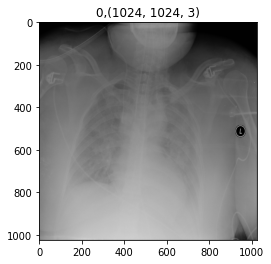

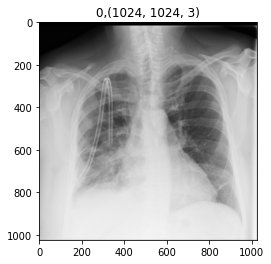

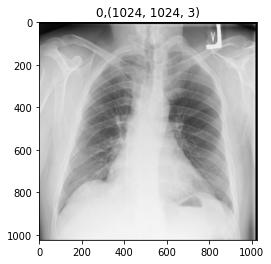

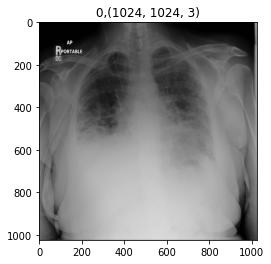

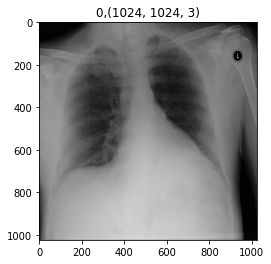

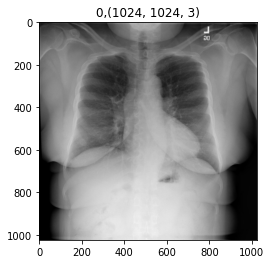

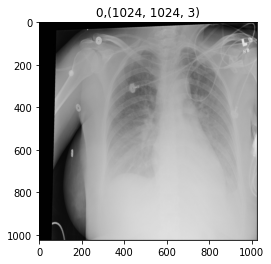

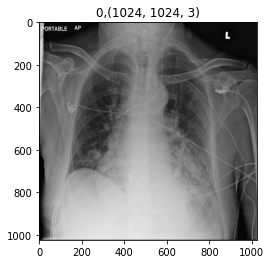

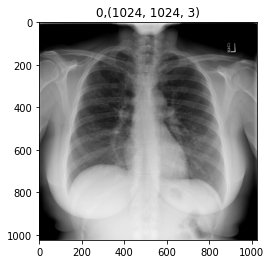

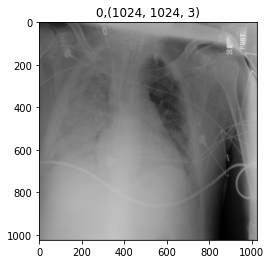

In [57]:
import glob

train_files = glob.glob('train/*')

for i in range(390,400):
  file = train_files[i].split('/')[-1]
  img = cv2.imread(train_files[i])
  label = train_data.loc[train_data['file'] == file]['class'].values[0]
  plt.imshow(img)
  plt.title("{},{}".format(label, img.shape))
  plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fefd63e7790>]],
      dtype=object)

<Figure size 720x360 with 0 Axes>

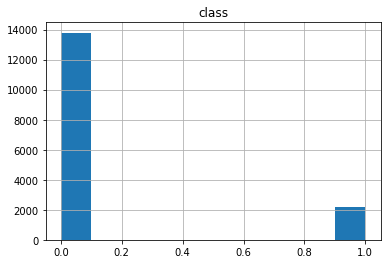

In [56]:
train_data.hist()

In [58]:
train_data.head()

,patient,file,class,source
0,25,acute-respiratory-distress-syndrome-ards-1.jpg,0,cohen
1,26,acute-respiratory-distress-syndrome-ards.jpg,0,cohen
2,27,ards-secondary-to-tiger-snake-bite.png,0,cohen
3,28,pneumocystis-pneumonia-2-PA.png,0,cohen
4,38,F051E018-DAD1-4506-AD43-BE4CA29E960B.jpeg,0,cohen


In [59]:
# we should split our training data into training and validation splits 
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_data['file'], train_data['class'], test_size=0.30, random_state=42)

In [107]:
# we can 
from torchvision import transforms
transform = transforms.Compose([
transforms.Resize((256, 256))])
#transforms.ToTensor(),
#transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [103]:
import os
import pandas as pd
from torchvision.io import read_image
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor

class CovidData(Dataset):
    def __init__(self, X, y, img_dir, transform=None, target_transform=None):
        self.imgs = X.values
        self.img_labels = y.values
        self.img_dir = img_dir
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.imgs[idx])
        image = read_image(img_path)
        label = self.img_labels[idx]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [108]:
training_arr = CovidData(X_train, y_train, 'train', transform = transform)
valid_arr = CovidData(X_test, y_test, 'train', transform=transform)


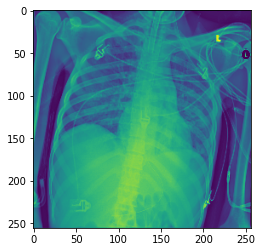

In [113]:
plt.imshow(training_arr[2132][0][0,:,:])

In [114]:
training_arr[2132][0].shape


torch.Size([1, 256, 256])